In [15]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### Load the Data

In [8]:
column_names = ['serial', 'date', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/data43.csv', names =column_names)
# check missing data
df.isna().sum()

serial       0
date         0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

### Normalize Data and convert label value

In [9]:
df = df.iloc[:,1:]
dn = (df-df.mean())/df.std()
y_mean = df['price'].mean()
y_std = df['price'].std()
def cl(pred):
    return int(pred * y_std + y_mean)

### Select Features and Train and Test split

In [10]:
x = dn.iloc[:,:6]
y = dn.iloc[:,-1]
x_arr = x.values
y_arr = y.values
x_train,x_test,y_train,y_test = train_test_split(x_arr,y_arr,test_size =0.05,random_state=0)

### Create the model

In [11]:
def gm():
    model = Sequential([
        Dense(10,input_shape = (6,),activation='relu'),
        Dense(20,activation = 'relu'),
        Dense(5,activation='relu'),
        Dense(1)
        
    ])
    model.compile(
        loss ='mse',
        optimizer ='adam'
        
    )
    return model
gm().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [12]:
es = EarlyStopping(monitor = 'val_loss', patience =5)
model =gm()
pu = model.predict(x_test)
h = model.fit(
    x_train, y_train,
    validation_data =(x_test,y_test),
    epochs=100,
    callbacks = [es]
)

Epoch 1/100
149/149 [==============================] - 1s 5ms/step - loss: 0.4915 - val_loss: 0.1024
Epoch 2/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0610 - val_loss: 0.0308
Epoch 3/100
149/149 [==============================] - 1s 3ms/step - loss: 0.0251 - val_loss: 0.0164
Epoch 4/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0134 - val_loss: 0.0106
Epoch 5/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0081 - val_loss: 0.0071
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.0023 - val_lo

### Plot Loss

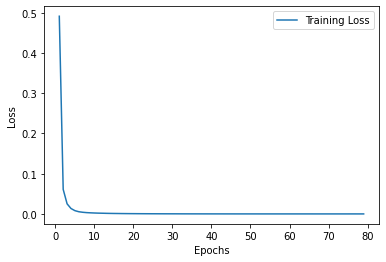

In [23]:
loss_values = h.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()